# Pairs Bootstrapping Activity: Code Solutions on The Second Pair: EquivDiameter and MajorAxisLength
## Statistical Computing Notebook W9

 *Name: Miguel Faustine Aguinaldo* | *Mapúa University* | *DS122*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress # here i am importing a scipy specific function lingress() for the linear regression instruction

In [3]:
data_set = pd.read_csv('dry_beans.csv') # loading the data set with pandas

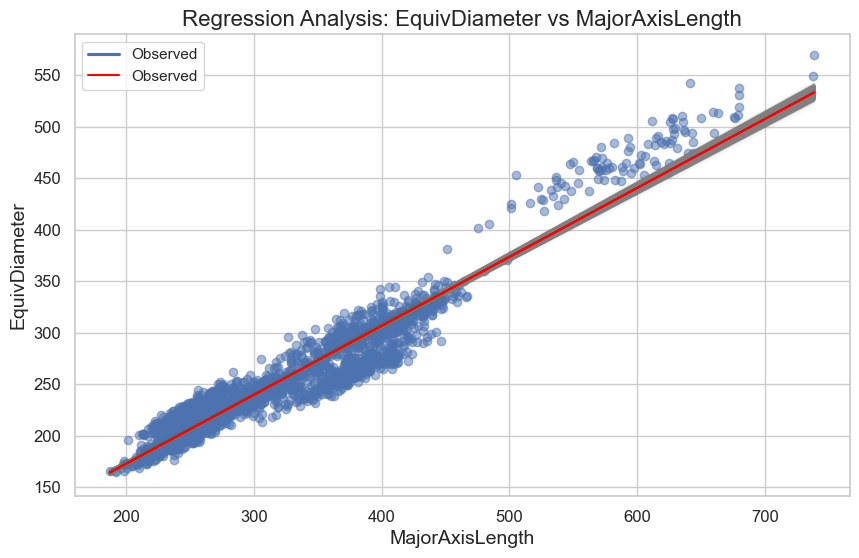

Observed Slope: 0.6691460031323585
Observed Intercept: 38.95320556063564
Bootstrapped Slopes: [0.6589033582991324, 0.6794915984771169, 0.6781047374752904, 0.6739860100534012, 0.6807000635660652]
Bootstrapped Intercepts: [42.46081451704211, 36.035736998544365, 35.95281230003684, 37.64255612208541, 35.75493392694264]


In [8]:
# Structure wise the two cells are extremely alike with their differences on the variable names alone. Since both are numeric 
# I did not need to change any string involved conversions etc.

data_set = pd.read_csv("dry_beans.csv")

pair_next = ['MajorAxisLength', 'EquivDiameter']

def pairs_bootstrapping(df, features, num_iterations=20000):
    data = df[features]

    bootstrapped_slopes = []
    bootstrapped_intercepts = []

    for _ in range(num_iterations):
        resampled_data = data.sample(frac=1, replace=True)

        slope, intercept, _, _, _ = linregress(resampled_data[features[0]], resampled_data[features[1]])

        bootstrapped_slopes.append(slope)
        bootstrapped_intercepts.append(intercept)

    observed_slope, observed_intercept, _, _, _ = linregress(data[features[0]], data[features[1]])

    return observed_slope, observed_intercept, bootstrapped_slopes, bootstrapped_intercepts

def plot_regression(df, features, observed_slope, observed_intercept, bootstrapped_slopes, bootstrapped_intercepts):
    sns.set(style="whitegrid")

    plt.figure(figsize=(10, 6))

    sns.regplot(x=features[0], y=features[1], data=df, scatter_kws={'alpha': 0.5}, line_kws={'label': 'Observed'})

    for i in range(len(bootstrapped_slopes)):
        plt.plot(df[features[0]], bootstrapped_slopes[i] * df[features[0]] + bootstrapped_intercepts[i], color='gray', alpha=0.01)

    plt.plot(df[features[0]], observed_slope * df[features[0]] + observed_intercept, color='red', label='Observed')

    plt.legend()
    plt.title(f'Regression Analysis: {features[1]} vs {features[0]}', fontsize=16)
    plt.xlabel(features[0], fontsize=14)
    plt.ylabel(features[1], fontsize=14)
    plt.tick_params(axis='both', which='both', labelsize=12)

    plt.show()

observed_slope_next, observed_intercept_next, bootstrapped_slopes_next, bootstrapped_intercepts_next = pairs_bootstrapping(data_set, pair_next, num_iterations=20000)
plot_regression(data_set, pair_next, observed_slope_next, observed_intercept_next, bootstrapped_slopes_next, bootstrapped_intercepts_next)

# Print the values
print(f"Observed Slope: {observed_slope_next}")
print(f"Observed Intercept: {observed_intercept_next}")
print(f"Bootstrapped Slopes: {bootstrapped_slopes_next[:5]}")  
print(f"Bootstrapped Intercepts: {bootstrapped_intercepts_next[:5]}") 


fin